Aufgabe: Finde (bis auf Isomorphie) alle abelsche Gruppen, deren Ordnung ein Teiler von $N = 75$ ist.

Idee: Verwende Satz 2.2.60:

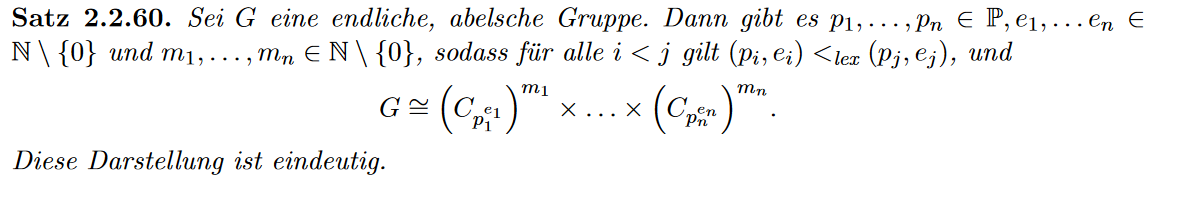

In [452]:
N = 25014

In [453]:
from math import prod

from IPython.display import display, Markdown

def factors_of_number(n: int) -> list[int]:
    factors = []
    for i in range(1, n + 1):
        if n % i == 0:
            factors.append(i)
    return factors

def is_prime(n: int) -> bool:
    factors = factors_of_number(n)
    return len(factors) == 2

def prime_factors_of_number_with_multiplicity(n: int) -> list[int]:
    factors = []
    while n != 1:
        for i in range(2, n + 1):
            if n % i == 0 and is_prime(i):
                factors.append(i)
                n //= i
                break
    return factors

def is_prime_power(n: int) -> bool:
    factors = prime_factors_of_number_with_multiplicity(n)
    return len(set(factors)) == 1

In [454]:
factors_of_N = factors_of_number(N)

print(factors_of_N)

[1, 2, 3, 6, 11, 22, 33, 66, 379, 758, 1137, 2274, 4169, 8338, 12507, 25014]


In [455]:
factors_of_factors = map(prime_factors_of_number_with_multiplicity, factors_of_N)

factors_of_factors = list(factors_of_factors)

factors_of_factors.remove([])

factors_of_factors

[[2],
 [3],
 [2, 3],
 [11],
 [2, 11],
 [3, 11],
 [2, 3, 11],
 [379],
 [2, 379],
 [3, 379],
 [2, 3, 379],
 [11, 379],
 [2, 11, 379],
 [3, 11, 379],
 [2, 3, 11, 379]]

The trivial group ist exactly that, trivial. We will now consider the other cases:

In [456]:
to_append =[]

for a in factors_of_factors:
    for f in factors_of_N:
        a_cpy = a.copy()
        if is_prime_power(f) and not is_prime(f):
            factors = prime_factors_of_number_with_multiplicity(f)
            replace = True
            for factor in factors:
                if factor in a_cpy:
                    a_cpy.remove(factor)
                else:
                    replace = False
                    break
            if replace:
                a_cpy.append(f)
                to_append.append(a_cpy)

factors_of_factors += to_append
    
factors_of_factors = set(map(tuple, factors_of_factors))

factors_of_factors = list(map(list, factors_of_factors))

factors_of_factors.sort(key=prod)

factors_of_factors

display(Markdown(f"## The other {len(factors_of_factors)} groups (up to isomorphism) are:"))
for i, factors in enumerate(factors_of_factors):
    display(Markdown(f"### Group {i + 1}"))
    craft_group = " $\\times$ ".join([f"$\\mathbb{{Z}}_{{{factor}}}$" for factor in factors])
    display(Markdown(f"The group is isomorphic to {craft_group}."))

## The other 15 groups (up to isomorphism) are:

### Group 1

The group is isomorphic to $\mathbb{Z}_{2}$.

### Group 2

The group is isomorphic to $\mathbb{Z}_{3}$.

### Group 3

The group is isomorphic to $\mathbb{Z}_{2}$ $\times$ $\mathbb{Z}_{3}$.

### Group 4

The group is isomorphic to $\mathbb{Z}_{11}$.

### Group 5

The group is isomorphic to $\mathbb{Z}_{2}$ $\times$ $\mathbb{Z}_{11}$.

### Group 6

The group is isomorphic to $\mathbb{Z}_{3}$ $\times$ $\mathbb{Z}_{11}$.

### Group 7

The group is isomorphic to $\mathbb{Z}_{2}$ $\times$ $\mathbb{Z}_{3}$ $\times$ $\mathbb{Z}_{11}$.

### Group 8

The group is isomorphic to $\mathbb{Z}_{379}$.

### Group 9

The group is isomorphic to $\mathbb{Z}_{2}$ $\times$ $\mathbb{Z}_{379}$.

### Group 10

The group is isomorphic to $\mathbb{Z}_{3}$ $\times$ $\mathbb{Z}_{379}$.

### Group 11

The group is isomorphic to $\mathbb{Z}_{2}$ $\times$ $\mathbb{Z}_{3}$ $\times$ $\mathbb{Z}_{379}$.

### Group 12

The group is isomorphic to $\mathbb{Z}_{11}$ $\times$ $\mathbb{Z}_{379}$.

### Group 13

The group is isomorphic to $\mathbb{Z}_{2}$ $\times$ $\mathbb{Z}_{11}$ $\times$ $\mathbb{Z}_{379}$.

### Group 14

The group is isomorphic to $\mathbb{Z}_{3}$ $\times$ $\mathbb{Z}_{11}$ $\times$ $\mathbb{Z}_{379}$.

### Group 15

The group is isomorphic to $\mathbb{Z}_{2}$ $\times$ $\mathbb{Z}_{3}$ $\times$ $\mathbb{Z}_{11}$ $\times$ $\mathbb{Z}_{379}$.